# Sitographie

* Sur [Interstices](https://interstices.info):
    * <https://interstices.info/le-probleme-du-sac-a-dos/>
    * <https://interstices.info/le-plus-court-chemin/>
    * <https://interstices.info/routage-dans-les-petits-mondes/>
    * <https://interstices.info/le-probleme-du-voyageur-de-commerce/>
* Sur Culture Maths :
    * <https://culturemath.ens.fr/thematiques/lycee/algorithmes-gloutons>

# Voyageur de commerce

In [233]:
class TSP2:
    """Classe pour problème du voyageur de commerce"""
    
    def __init__(self, v, d):
        # liste de noms de villes
        self.nom_ville = v 
        # nombre de villes
        self.nb_villes = len(self.nom_ville) 
        # dictionnaire :  nom de ville -> index dans self.nom_ville
        self.index_ville = {self.nom_ville[k]: k  for k in range(self.nb_villes)}
        # tableau 2d des distances entre villes (repérées par leur index)
        self.distance = d      
        # tableau de marques des villes déjà visités dans le circuit glouton
        self.visite = [False for _ in range(self.nb_villes)]
        
    def plus_proche(self, va):
        """Renvoie le couple (distance minimale, index ville la plus proche)
        pour une ville d'index va dans self.nom_ville
        """
        dmin = float('inf')
        for vb in range(self.nb_villes):
            if vb != va and (not self.visite[vb]) and  self.distance[va][vb] < dmin:
                dmin = self.distance[va][vb]
                vmin = vb
        return (dmin, vmin)

    def meilleur_circuit_glouton(self, nom_depart):
        """
        Renvoie le couple (distance totale circuit, liste de noms
        des villes d'un circuit hamiltonien construit par heuristique gloutonne)
        """
        vd = self.index_ville[nom_depart]
        derniere_etape = vd
        circuit = [derniere_etape]      
        self.visite[derniere_etape] = True
        dist_totale = 0
        for _ in range(self.nb_villes - 1):
            dist_etape, prochaine_etape = self.plus_proche(derniere_etape)
            dist_totale  = dist_totale  + dist_etape
            derniere_etape = prochaine_etape
            circuit.append(derniere_etape)
            self.visite[derniere_etape] = True
        circuit.append(circuit[0])
        dist_totale  = dist_totale + self.distance[circuit[-2]][circuit[-1]]        
        return (dist_totale, [self.nom_ville[v] for v in circuit])
    
    
def test_meilleur_circuit_glouton():
    nom_ville = ['Nancy', 'Metz', 'Paris', 'Reims', 'Troyes' ]
    distance = [[0, 55, 303, 188, 183], 
                [55, 0, 306, 176, 203], 
                [303, 306, 0, 142, 153],
                [188, 176, 142, 0, 123], 
                [183, 203, 153, 123, 0]]
    tsp2 = TSP2(nom_ville, distance)
    (dmin, vmin) = tsp2.meilleur_circuit_glouton("Nancy")
    vmin_nancy = vmin[vmin.index('Nancy'):-1] + vmin[:vmin.index('Nancy') + 1]
    attendu = ['Nancy', 'Metz', 'Reims', 'Troyes', 'Paris', 'Nancy']
    assert dmin == 810  and  (vmin_nancy == attendu or vmin_nancy[::-1] == attendu)
    print("tests réussis pour meilleur_circuit_glouton")

    
test_meilleur_circuit_glouton()

tests réussis pour meilleur_circuit_glouton


In [224]:
ville2 = ['Nancy', 'Metz', 'Paris', 'Reims', 'Troyes' ]
distance2 = [[0, 55, 303, 188, 183], 
            [55, 0, 306, 176, 203], 
            [303, 306, 0, 142, 153],
            [188, 176, 142, 0, 123], 
            [183, 203, 153, 123, 0]]
tsp2 = TSP2(ville2, distance2)

In [227]:
tsp2.meilleur_circuit_glouton('Nancy')

(810, ['Nancy', 'Metz', 'Reims', 'Troyes', 'Paris', 'Nancy'])

In [86]:
tsp1.meilleur_voyage_exhaustif()

(709, ['Troyes', 'Paris', 'Reims', 'Metz', 'Nancy', 'Troyes'])

In [222]:
class TSP1:
    """Classe pour Travel Salesman Problem"""
    
    def __init__(self, v, d):
        # liste de noms de villes
        self.nom_ville = v 
        # nombre de villes
        self.nb_villes = len(self.nom_ville) 
        # dictionnaire :  nom de ville -> index dans self.nom_ville
        self.index_ville = {self.nom_ville[k]: k  for k in range(self.nb_villes)}
        # tableau 2d des distances entre villes (repérées par leur index)
        self.distance = d        
        
    def distance_circuit(self, circuit):
        """Distance totale parcourue dans le circuit hamiltonien circuit
        qui est une liste d'indexs de villes dans self.nom_ville"""
        d = 0
        for k in range(len(circuit) - 1):
            d = d + self.distance[circuit[k]][circuit[k + 1]]
        return d
        
    def meilleur_circuit_bruteforce(self):
        """Renvoie le couple (distance minimale, circuit minimal)
        où circuit minimal est un circuit hamiltonien de distance minimale
        """
        dmin = float('inf')
        for p in permutations(self.nb_villes - 1):
            circuit = p + [p[0]]
            d = self.distance_circuit(circuit)
            if d < dmin:
                dmin = d
                vmin = [self.nom_ville[v] for v in circuit]
        return (dmin, vmin)

        
        
def permutations(n):
    """Renvoie toutes les permutations de la séquence d'entiers consécutifs [0, 1, 2, ..., n]"""
    if n == 0:
        return [[0]]
    return [p[:i]   + [n]  + p[i:]  for p in permutations(n - 1) for i in range(len(p) + 1)]
            
def test_permutations():
    assert sorted(permutations(1)) == [[0, 1], [1, 0]]
    assert sorted(permutations(2)) == [[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]
    print("tests réussis pour permutations")
    
def test_circuit_brute_force():
    nom_ville = ['Nancy', 'Metz', 'Paris', 'Reims', 'Troyes' ]
    distance = [[0, 55, 303, 188, 183], 
                [55, 0, 306, 176, 203], 
                [303, 306, 0, 142, 153],
                [188, 176, 142, 0, 123], 
                [183, 203, 153, 123, 0]]
    tsp1 = TSP1(nom_ville, distance)
    (dmin, vmin) = tsp1.meilleur_circuit_bruteforce()
    vmin_nancy = vmin[vmin.index('Nancy'):-1] + vmin[:vmin.index('Nancy') + 1]
    attendu = ['Nancy', 'Troyes', 'Paris', 'Reims', 'Metz', 'Nancy']
    assert dmin == 709 and  (vmin_nancy == attendu or vmin_nancy[::-1] == attendu)
    print("tests réussis pour circuit_brute_force")

test_permutations()
test_circuit_brute_force()

tests réussis pour permutations
tests réussis pour circuit_brute_force


In [210]:
sorted(permutations(2))

[[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

# Ordonnancement glouton

In [89]:
def tri_jobs(liste_taches, clef):
    return sorted(liste_taches, key=clef)

In [107]:
def critere_ratio_glouton(tache):
    longueur, priorite = tache
    return longueur / priorite

In [108]:
def critere_diff_glouton(tache):
    longueur, priorite = tache
    return longueur - priorite

In [91]:
def cout_global(ordo_taches):
    attente_fin = 0
    cout = 0
    for tache in ordo_taches:
        longueur, priorite = tache
        attente_fin =  attente_fin + longueur
        cout = cout + attente_fin * priorite 
    return cout      

In [101]:
def ordonnancement_glouton(liste_taches, critere_glouton):
    ordo = tri_jobs(liste_taches,  critere_glouton)
    return (cout_global(ordo), ordo)

In [10]:
import random

def tri_taches(liste_taches, clef):
    """Renvoie le tri de liste_taches 
    selon la fonction de clef de tri"""
    return sorted(liste_taches, key=clef)

def critere_ratio_glouton(tache):
    """Renvoie pour la tache qui est un couple (longueur, priorite)
    la valeur du quotient longueur / priorite
    """
    longueur, priorite = tache
    return longueur / priorite

def critere_diff_glouton(tache):
    """Renvoie pour la tache qui est un couple (longueur, priorite)
    la valeur de la différence longueur - priorite
    """
    longueur, priorite = tache
    return longueur - priorite

def objectif(ordo_taches):
    """
    Renvoie la valeur de la fonction objectif pour une liste 
    de taches (des couples (longueur, priorite) )
    La fonction objectif est la somme des  temps de complétion pondérés
    par les priorités
    """
    temps_completion = 0
    somme = 0
    for tache in ordo_taches:
        longueur, priorite = tache
        temps_completion =  temps_completion + longueur
        somme = somme + temps_completion * priorite 
    return somme    


def ordonnancement_glouton(liste_taches, critere_glouton):
    """Renvoie le couple 
    (valeur de la fonction objectif, ordonnancement des taches selon le critere glouton)"""
    ordo = tri_taches(liste_taches,  critere_glouton)
    return (objectif(ordo), ordo)


def test_ordonnancement_glouton():
    liste_taches1 = [(7, 2), (46, 3), (10, 6), (36, 10), (17, 6)]
    assert ordonnancement_glouton(liste_taches1, critere_ratio_glouton) == (1338, [(10, 6), (17, 6), (7, 2), (36, 10), (46, 3)])
    assert ordonnancement_glouton(liste_taches1, critere_diff_glouton) == (1346, [(10, 6), (7, 2), (17, 6), (36, 10), (46, 3)])
    print("tests réussis pour ordonnancement_glouton")
    
def comparaison(critere1, critere2, nb_exp):
    """
    Pour nb_exp listes de taches aléatoires
    Renvoie une liste res :
    
    res[0] est le nombre de fois où l'ordonnancement par critere1 et critere2 
    donnent la même valeur pour la fonction objectif
    
    res[1] est le nombre de fois où l'ordonnancement par critere1 est meilleur (plus petit)
    que celui par critere2
    
    res[2] est le nombre de fois où l'ordonnancement par critere1 est meilleur (plus petit)
    que celui par critere2    
    """
    res = [0, 0, 0]
    for _ in range(nb_exp):
        liste_taches = [(random.randint(1, 100), random.randint(1, 10)) for _ in range(50)]
        c1, _ =  ordonnancement_glouton(liste_taches, critere1)
        c2, _ =  ordonnancement_glouton(liste_taches, critere2)
        if c1 < c2:
            res[1] += 1
        elif c2 < c1:
            res[2] += 1
        else:
            res[0] += 1
    return res


test_ordonnancement_glouton()
comparaison(critere_ratio_glouton,  critere_diff_glouton, 100)

tests réussis pour ordonnancement_glouton


[0, 100, 0]

In [156]:
import random

def generer_taches(n):
    return [(random.randint(1, 50), random.randint(1, 10)) for _ in range(n)]

In [98]:
liste_taches1 = generer_taches(5)
liste_taches1

[(7, 2), (46, 3), (10, 6), (36, 10), (17, 6)]

In [109]:
ordonnancement_glouton(liste_taches1, critere_ratio_glouton)

(1338, [(10, 6), (17, 6), (7, 2), (36, 10), (46, 3)])

In [110]:
ordonnancement_glouton(liste_taches1, critere_diff_glouton)

(1346, [(10, 6), (7, 2), (17, 6), (36, 10), (46, 3)])

In [116]:
def comparaison(critere1, critere2, nb_exp):
    res = [0, 0, 0]
    for _ in range(nb_exp):
        liste_taches = generer_taches(50)
        c1, _ =  ordonnancement_glouton(liste_taches, critere1)
        c2, _ =  ordonnancement_glouton(liste_taches, critere2)
        if c1 < c2:
            res[1] += 1
        elif c2 < c1:
            res[2] += 1
        else:
            res[0] += 1
    return res

In [166]:
comparaison(critere_ratio_glouton, critere_diff_glouton, 100)

[0, 100, 0]

In [170]:
comparaison(critere_diff_glouton, critere_ratio_glouton,100)

[0, 0, 100]

# Rendu de monnaie

## Cas de sommes entières

In [29]:
EURO = [1, 2, 5, 10, 20, 50, 100, 200, 500]

def rendu_monnaie_1(s, P):
    i  = len(P) - 1
    rendu = []
    while s > 0 and i >= 0:
        if P[i] <= s:
            s = s - P[i]
            rendu.append(P[i])
        else:
            i = i - 1
    return rendu

#tests unitaires 
assert rendu_monnaie_1(49, EURO)  == [20, 20, 5, 2, 2]
assert rendu_monnaie_1(76, EURO) == [50, 20, 5, 1]

In [243]:
def rendu_glouton(restant, pieces):
    # pieces tableau de valeurs de pièces disponibles dans l'ordre croissant
    indice_pieces = len(pieces) - 1
    rendu = []
    while restant > 0 and  indice_pieces >= 0:
        if pieces[indice_pieces] <= restant:
            restant = restant - pieces[indice_pieces]
            rendu.append(pieces[indice_pieces])
        else:
            indice_pieces = indice_pieces - 1
    # rendu possible
    return rendu

def test_rendu_glouton():
    systeme_euro = [1, 2, 5, 10, 20, 50, 100, 200, 500]
    assert rendu_glouton(76, systeme_euro) == [50, 20, 5, 1]
    assert rendu_glouton(49, systeme_euro) == [20, 20, 5, 2, 2]
    assert rendu_glouton(843, systeme_euro) == [500, 200, 100, 20, 20, 2, 1]
    systeme_non_canonique = [1, 3, 6, 12, 24, 30]
    assert rendu_glouton(49 , systeme_non_canonique) == [30, 12, 6, 1]
    assert rendu_glouton(53 , systeme_non_canonique) == [30, 12, 6, 3, 1, 1]
    print("tests réussis pour rendu_glouton")

In [248]:
[30, 24, 12, 6, 3, 1][::-1]

[1, 3, 6, 12, 24, 30]

In [264]:
systeme_non_canonique = [1, 3, 6, 12, 24, 30]
rendu_glouton(53 , systeme_non_canonique)

[30, 12, 6, 3, 1, 1]

In [237]:
systeme_euro = [500, 200, 100, 50, 20, 10, 5, 2, 1]
systeme_euro[::-1]

[1, 2, 5, 10, 20, 50, 100, 200, 500]

In [247]:
systeme_euro = [1, 2, 5, 10, 20, 50, 100, 200, 500]
rendu_glouton(843, systeme_euro)

[500, 200, 100, 20, 20, 2, 1]

In [273]:
def rendu_rec(restant, pieces, indice_pieces):
    # pieces contient les valeurs des pièces disponibles par ordre croissant
    if restant == 0:
        return []
    if pieces[indice_pieces] <= restant:
        rep = rendu_rec(restant - pieces[indice_pieces], pieces, indice_pieces)
        rep.append(pieces[indice_pieces])                
    else:
        rep = rendu_rec(restant, pieces, indice_pieces - 1)
    return rep

def rendu_glouton2(restant, pieces):
    return rendu_rec(restant, pieces, len(pieces) - 1)

def test_rendu_glouton2():
    systeme_euro = [1, 2, 5, 10, 20, 50, 100, 200, 500]
    assert rendu_glouton2(76, systeme_euro) == [1, 5, 20, 50]
    assert rendu_glouton2(49, systeme_euro) == [2, 2, 5, 20, 20]
    assert rendu_glouton2(843, systeme_euro) == [1, 2, 20, 20, 100, 200, 500]
    systeme_non_canonique = [1, 3, 6, 12, 24, 30]
    assert rendu_glouton2(49 , systeme_non_canonique) == [1, 6, 12, 30]
    assert rendu_glouton2(53 , systeme_non_canonique) == [1, 1, 3, 6, 12, 30]
    print("tests réussis pour rendu_glouton2")
    
test_rendu_glouton2()

tests réussis pour rendu_glouton2


In [272]:
systeme_non_canonique = [1, 3, 6, 12, 24, 30]
rendu_glouton2(53, systeme_non_canonique)

[1, 1, 3, 6, 12, 30]

In [30]:
EURO_COMPLET = [0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1, 2, 5, 10, 20, 50, 100, 200, 500]

Problèmes d'approximation avec les flottants !

In [31]:
rendu_monnaie_1(13.45, EURO_COMPLET)

[10, 2, 1, 0.2, 0.2, 0.02, 0.02]

In [32]:
13.45 - 10

3.4499999999999993

In [33]:
13 + 0.4 + 0.05

13.450000000000001

On adapte en comptant en centimes !

In [34]:
def rendu_monnaie_2(s, P):
    return [r // 100 if r >= 100 else r / 100 for r  in rendu_monnaie_1(s * 100, [e * 100 for e in P])]


In [35]:
rendu_monnaie_2(13.45, EURO_COMPLET)

[10, 2, 1, 0.2, 0.2, 0.05]

In [36]:
rendu_monnaie_2(25.58, EURO_COMPLET)

[20, 5, 0.5, 0.05, 0.02, 0.01]

L'ancier  système monétaire impérial anglais n'était pas canonique !

In [38]:
IMPERIAL = [1,3,6,12,24,30]
rendu_monnaie_2(49, IMPERIAL)

[30, 12, 6, 1]

# Placement de pylones

In [ ]:
def alpha(i, k):
    assert k > i
    return (L_h[k] + delta  - (L_h[i] + l)) / (k - i)

In [39]:
def beta(i, j):
    assert j > i
    return (L_h[j] + l  - (L_h[i] + l)) / (j - i)

In [40]:
def respecte_legislation(i, j):
    b = beta(i, j)
    for k in range(i + 1, j):
        if b < alpha(i, k):
            return False
    return True

In [41]:


def strategie_glouton_avant():
    """Complexité en O(n**2)   si on majore 
    respecte_legislation(dernier, prochain) par C * n"""
    n = len(L_h) - 1
    pylones = [0]
    dernier = 0
    prochain = dernier + 1
    while prochain <= n:
        if prochain != n and respecte_legislation(dernier, prochain):
            prochain = prochain + 1
        elif prochain != n:
            pylones.append(prochain - 1)
            dernier = prochain - 1
        else:
            pylones.append(prochain)
            prochain = prochain + 1
    return pylones


def strategie_glouton_au_plus_loin():
    """Complexité en O(n**2)   si on majore 
    respecte_legislation(dernier, prochain) par C * n"""
    n = len(L_h) - 1
    pylones = [0]
    dernier = 0
    prochain = n
    while dernier < n:
        if respecte_legislation(dernier, prochain):
            dernier = prochain
            prochain = n
        else:
            prochain = prochain - 1
    return pylones


# Problème du sac à dos

In [2]:
import csv # import du module
f = open('videos.csv', mode = 'r', encoding = 'utf8', newline = '')
reader = csv.DictReader(f, delimiter = ',') #création d'un objet reader
table_video = [dict(enregistrement) for enregistrement in reader]
f.close()
table_video

[{'Fichier': 'Vidéo 1', 'Durée': '114', 'Taille': '4570'},
 {'Fichier': 'Vidéo 2', 'Durée': '32', 'Taille': '630'},
 {'Fichier': 'Vidéo 3', 'Durée': '20', 'Taille': '1650'},
 {'Fichier': 'Vidéo 4', 'Durée': '4', 'Taille': '85'},
 {'Fichier': 'Vidéo 5', 'Durée': '18', 'Taille': '2150'},
 {'Fichier': 'Vidéo 6', 'Durée': '80', 'Taille': '2710'},
 {'Fichier': 'Vidéo 7', 'Durée': '5', 'Taille': '320'}]

In [5]:
csv.DictReader??

In [6]:
def incrementation_binaire(tableau_bits):
    copie = tableau_bits[:]
    k = len(tableau_bits) - 1
    while k >= 0 and copie[k] != 0:
        copie[k] = 0
        k = k - 1
    copie[k] = 1
    return copie

def liste_parties(n):
    """Renvoie la liste des parties 
    d'un ensemble à n éléments codées en binaire"""    
    dernier = [0] * n
    liste = [dernier]
    for k in range(2 ** n - 1):
        dernier = incrementation_binaire(dernier)
        liste.append(dernier)
    return liste

def somme_tab(t):
    s = 0
    for e in t:
        s = s + e
    return s

def force_brute(fichiers, taille_max):
    n = len(fichiers)
    parties = liste_parties(n)
    selection_max =  [f for f in fichiers if float(f['Taille']) <= taille_max][0]
    duree_max =  float(selection_max['Durée'])
    for p in parties:
        selection = [fichiers[k] for k in range(n) if p[k] == 1]
        duree = somme_tab([float(f['Durée']) for f in selection])
        taille = somme_tab([float(f['Taille']) for f in selection])
        if taille <= taille_max and duree > duree_max:
            selection_max = selection
            duree_max = duree
    return duree_max, selection_max
        

In [7]:
liste_parties(3)

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [8]:
force_brute(table_video, 8000)

(230.0,
 [{'Fichier': 'Vidéo 1', 'Durée': '114', 'Taille': '4570'},
  {'Fichier': 'Vidéo 2', 'Durée': '32', 'Taille': '630'},
  {'Fichier': 'Vidéo 4', 'Durée': '4', 'Taille': '85'},
  {'Fichier': 'Vidéo 6', 'Durée': '80', 'Taille': '2710'}])

In [1]:
def gloutons(fichiers, taille_max):
    i = 0
    taille = 0
    duree = 0
    n = len(fichiers)
    selection = []
    while taille <= taille_max and i < n:
        taille_fichier = float(fichiers[i]['Taille'])
        if taille + taille_fichier <= taille_max:
            taille = taille + taille_fichier
            selection.append(fichiers[i]['Fichier'])
            duree = duree + float(fichiers[i]['Durée'])
        i = i + 1
    return duree, selection

In [3]:
gloutons(sorted(table_video, key = lambda f : float(f['Taille'])), 5000)

(79.0, ['Vidéo 4', 'Vidéo 7', 'Vidéo 2', 'Vidéo 3', 'Vidéo 5'])

In [4]:
gloutons(sorted(table_video, key = lambda f : float(f['Durée'])/float(f['Taille']), reverse = True), 5000)

(121.0, ['Vidéo 2', 'Vidéo 4', 'Vidéo 6', 'Vidéo 7'])

In [5]:
gloutons(sorted(table_video, key = lambda f : float(f['Durée']), reverse = True), 5000)

(123.0, ['Vidéo 1', 'Vidéo 7', 'Vidéo 4'])

# Problème de planning

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def echantillon(binf, bsup, n):
    assert binf < bsup
    t = []
    for _ in range(n):
        duree = 0
        while duree == 0:
            duree = random.randint(0, bsup - binf)
        debut = random.randint(binf, bsup - duree)
        t.append([debut, debut + duree])
    return t

In [46]:
echantillon(8, 18, 10)

[[9, 16],
 [14, 18],
 [14, 16],
 [16, 18],
 [8, 18],
 [12, 13],
 [14, 16],
 [9, 10],
 [10, 16],
 [8, 16]]

In [3]:
def graphique(echantillon, solution = []):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.grid(True)
    ax.set_yticks([])
    ax.set_xlabel('Temps')
    ax.set_title("Demandes de réservation")
    n = len(echantillon)
    for k in range(n):
        debut, fin = echantillon[k]
        if echantillon[k] in solution:
            plt.plot([debut, fin], [k + 1,k + 1], linewidth=2, marker = 'o')
        else:
            plt.plot([debut, fin], [k + 1,k + 1], linewidth=2, linestyle='dashed', marker = 'o')
    plt.show()

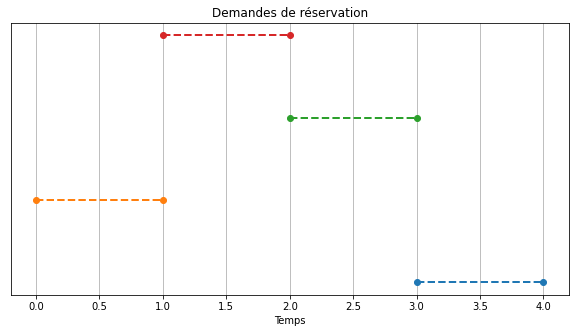

In [4]:
graphique([[3,4], [0,1], [2,3], [1,2]])

In [ ]:
graphique([[3,4], [0,1], [2,3], [1,2]])

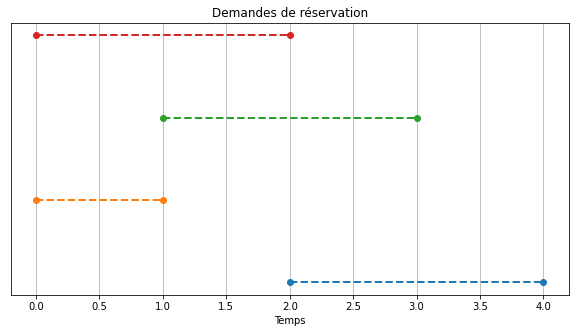

In [6]:
graphique([[2,4], [0,1], [1,3], [0,2]])

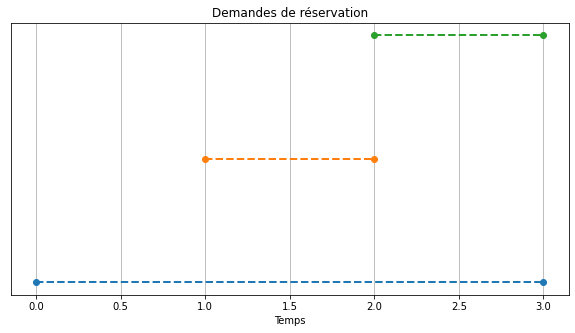

In [7]:
graphique([[0,3],[1,2],[2,3]])

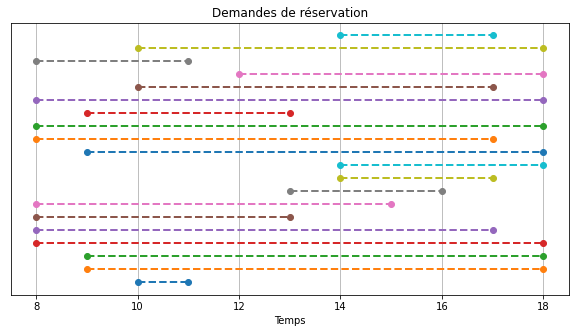

In [112]:
e = echantillon(8, 18, 20)
graphique(e)

In [54]:
def planning_glouton(liste_demande):
    selection = []
    for k in range(len(liste_demande)):
        demande = liste_demande[k]
        debut = demande[0]
        fin = demande[1]
        if (len(selection) > 0):
            fin_preced = selection[len(selection)-1][1]
            if fin_preced <= debut:
                selection.append(demande)
        else:
            selection.append(demande)
    return selection

In [58]:
e = echantillon(8, 18, 20)

In [59]:
e

[[15, 17],
 [14, 18],
 [8, 15],
 [10, 12],
 [8, 17],
 [13, 17],
 [8, 14],
 [8, 11],
 [8, 16],
 [8, 18],
 [9, 12],
 [8, 14],
 [10, 12],
 [9, 10],
 [8, 18],
 [9, 16],
 [9, 11],
 [9, 15],
 [10, 18],
 [8, 10]]

In [60]:
planning_glouton(e)

[[15, 17]]

In [101]:
def clef_tri_fin(demande):
    return (demande[1], demande[0])

Echantillon
[[6, 24], [1, 14], [17, 24], [9, 16], [8, 23], [5, 23], [2, 24], [2, 23], [1, 24], [0, 17]]


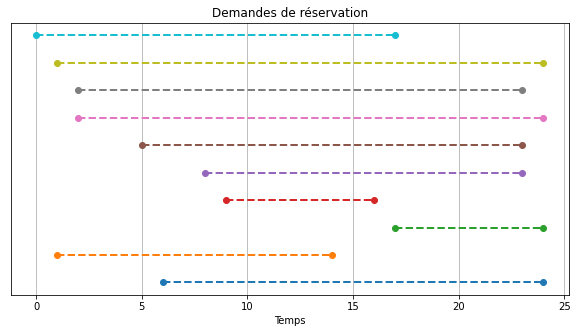

Planning glouton sans tri


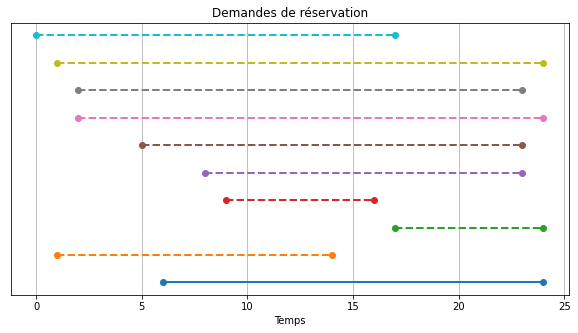

[[6, 24]]
Planning glouton avec tri par début croissant


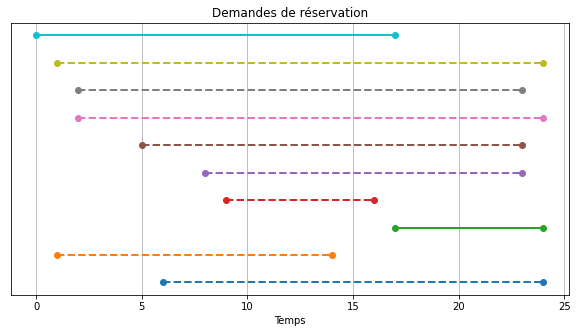

Planning glouton avec tri par fin croissante


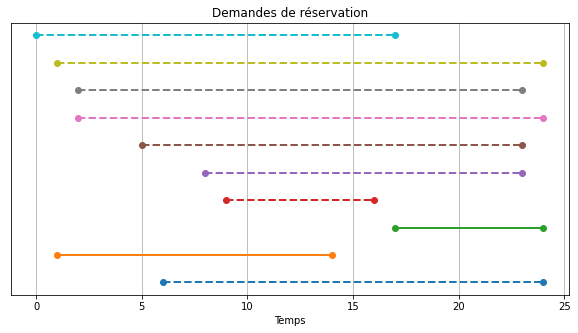

In [108]:
e = echantillon(0, 24, 10)
print("Echantillon")
print(e)
graphique(e)
print("Planning glouton sans tri")
p1 = planning_glouton(e)
graphique(e, p1)
print(p1)
print("Planning glouton avec tri par début croissant")
p2 = planning_glouton(sorted(e))
graphique(e, p2)
print("Planning glouton avec tri par fin croissante")
p3 = planning_glouton(sorted(e, key = clef_tri_fin))
graphique(e, p3)

In [130]:
def comparaison_choix(nb_essais, binf, bsup, nb_demandes):
    fig, ax = plt.subplots(figsize=(10, 5))
    t = []
    tdc = []
    tfc = []
    for _ in range(nb_essais):
        e = echantillon(binf, bsup, nb_demandes)
        p = planning_glouton(e)
        pdc = planning_glouton(sorted(e))
        pfc = planning_glouton(sorted(e, key = clef_tri_fin))
        t.append(len(p))
        tdc.append(len(pdc))
        tfc.append(len(pfc))
    ax.set_title(f"Comparaison d'heuristiques : binf = {binf} | bsup = {bsup} | demandes = {nb_demandes}")
    ax.plot(t, label = 'sans tri', marker='o')
    ax.plot(tdc, label = 'tri début croissant', marker='+')
    ax.plot(tfc, label = 'tri fin croissante', marker='x')
    ax.legend(loc = 'best')
    plt.show()

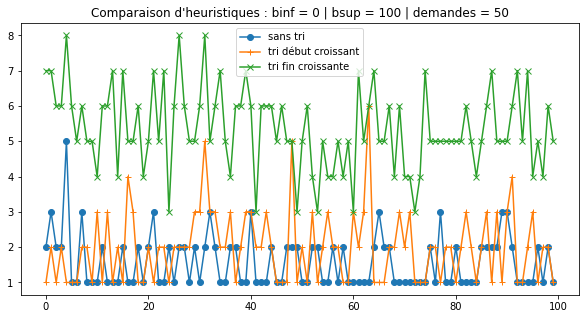

In [131]:
comparaison_choix(100, 0, 100, 50)